# 4-2 Line Detectors

### Import Packages

In [4]:
import numpy as np
import scipy as sp
import cv2
import time

from matplotlib import pyplot as plt
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels

### Load the image and resize

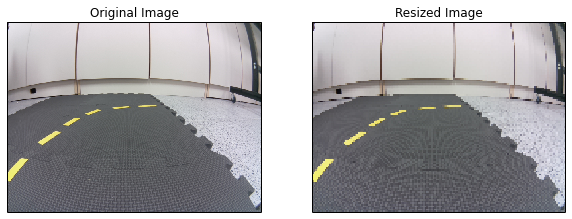

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Use your own image
img = cv2.imread("images/curve-right.jpg")

image_cv = cv2.resize(img, (160, 120),interpolation=cv2.INTER_NEAREST)

dst1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#dst1 = img #if don't change color
plt.subplot(121),plt.imshow(dst1,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

dst2 = cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst2,cmap = 'brg')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Find the Edges

You should find the config file 'universal.yaml'

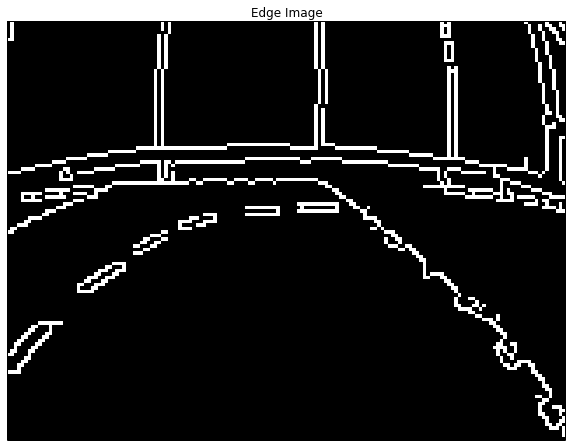

In [6]:
gray = cv2.cvtColor(image_cv,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,100,350)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Try the Canny edge without resize

In [7]:
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#edges=cv2.Canny(gray,100,350)
#plt.imshow(edges,cmap = 'gray')
#plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
#plt.show()

### Setup HSV Space Threshold
Define what is "white" "yellow" "red"

You should find the config file 'universal.yaml'

In [8]:
hsv_white1 = np.array([0,0,150])
hsv_white2 = np.array([180,100,255])
hsv_yellow1 = np.array([25,50,50])
hsv_yellow2 = np.array([45,255,255])
hsv_red1 = np.array([0,100,100])
hsv_red2 = np.array([15,255,255])
hsv_red3 = np.array([165,100,100])
hsv_red4 = np.array([180,255,255])

### Threshold colors in HSV space

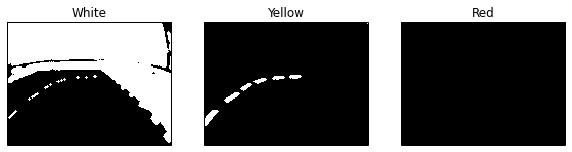

In [9]:
hsv = cv2.cvtColor(image_cv,cv2.COLOR_BGR2HSV)
#print hsv
white = cv2.inRange(hsv,hsv_white1,hsv_white2)
#print white
yellow = cv2.inRange(hsv,hsv_yellow1,hsv_yellow2)
red1 = cv2.inRange(hsv,hsv_red1,hsv_red2)
red2 = cv2.inRange(hsv,hsv_red3,hsv_red4)
red = cv2.bitwise_or(red1,red2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))
white = cv2.dilate(white, kernel)
yellow = cv2.dilate(yellow, kernel)
red = cv2.dilate(red, kernel)
# Uncomment '#' to plot with color
x = cv2.cvtColor(yellow, cv2.COLOR_GRAY2BGR)
x[:,:,2] *= 1
x[:,:,1] *= 1
x[:,:,0] *= 0
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

y = cv2.cvtColor(red, cv2.COLOR_GRAY2BGR)
y[:,:,2] *= 1
y[:,:,1] *= 0
y[:,:,0] *= 0
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(white,cmap = 'gray')
plt.title('White'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(yellow,cmap = 'gray')
#plt.subplot(132),plt.imshow(x,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(red,cmap = 'gray')
plt.subplot(133),plt.imshow(y,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])



plt.show()

### Combine Edge and Colors

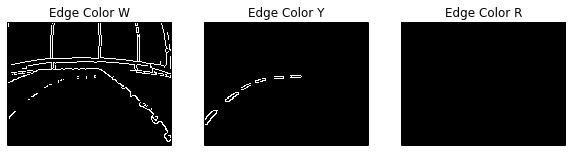

In [10]:
edge_color_white=cv2.bitwise_and(edges,white)
edge_color_yellow=cv2.bitwise_and(edges,yellow)
edge_color_red=cv2.bitwise_and(edges,red)

plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(131),plt.imshow(edge_color_white,cmap = 'gray')
plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge_color_red,cmap = 'gray')
plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

### Find the Lines

In [16]:
lines_white = cv2.HoughLinesP(edge_color_white,1,np.pi/180,10,np.empty(1),1.5,1)
lines_yellow = cv2.HoughLinesP(edge_color_yellow,1,np.pi/180,10,np.empty(1),1.5,1)
lines_red = cv2.HoughLinesP(edge_color_red,1,np.pi/180,10,np.empty(1),1.5,1)

color = "yellow"
lines = lines_yellow
bw = yellow

color = "white"
lines = lines_white
bw = white

#color = "red"
#lines = lines_red
#bw = red

if lines is not None:
    lines = np.array(lines[0])
    print "found lines"

else:
    lines = []
    print "no lines"

found lines


## What if the input is lines_white? lines_red? 

### Show the lines (yellow)

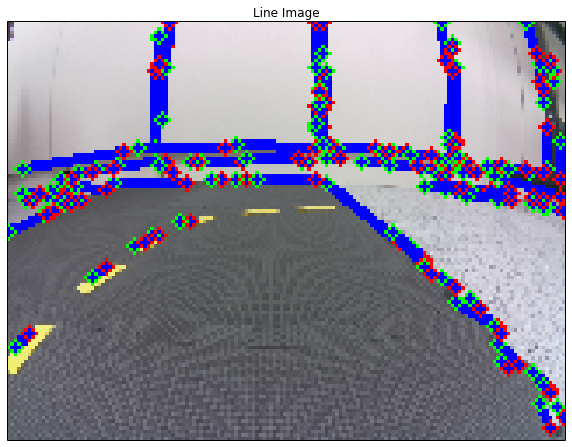

In [17]:
image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

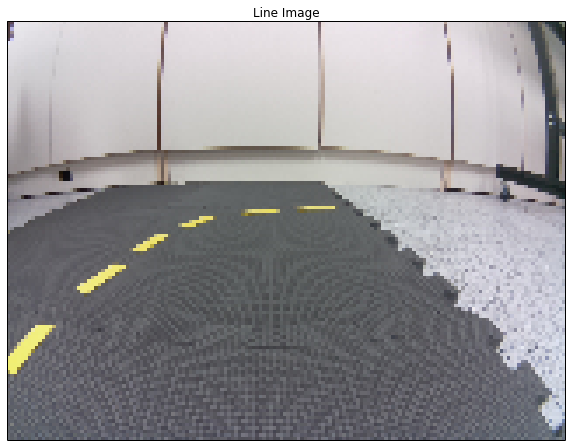

In [13]:
image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

## More Examples about Canny Edge Detector 

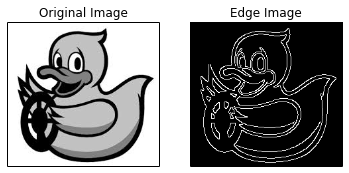

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('images/duckietown.jpg',0)
edges = cv2.Canny(img,100,200)

#img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

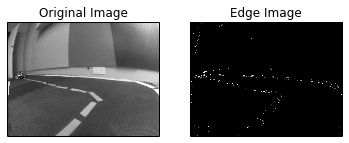

In [3]:
img = cv2.imread('images/line.jpg',0)
edges = cv2.Canny(img,50, 100)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

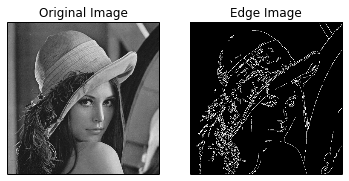

In [4]:
img = cv2.imread('images/lena.bmp',0)
edges = cv2.Canny(img,100, 200)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## More about Filters 

In [5]:
a = np.random.rand(100, 100)
a*=100

In [6]:
from scipy.ndimage.filters import gaussian_filter
gauss = np.zeros((100,100))
gaussian_filter(a, 2, output = gauss)

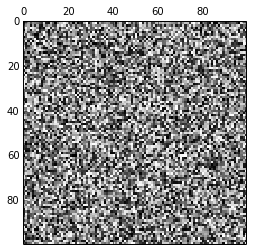

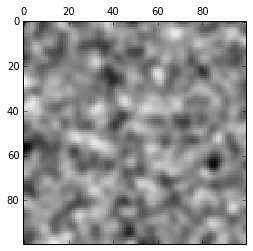

In [7]:
plt.matshow(a, cmap=plt.cm.gray)
plt.matshow(gauss, cmap=plt.cm.gray)
plt.show()

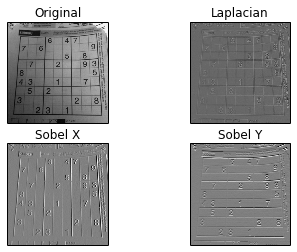

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## Advanced: More about Convolution and Thresholding

We can use threshold mask as a tool to detec object

In [ ]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [ ]:
import numpy as np
a = np.zeros((100, 100))

In [ ]:
l_mat = np.zeros((5, 5))
l_map = [(1, 2), (2, 2), (3, 2), (3, 3)]
for (i,j) in l_map :
    l_mat[i][j]=100

In [ ]:
plt.matshow(l_mat, cmap=plt.cm.gray)
plt.show()

In [ ]:
for i in range(30) :
    x = int(np.random.random()*94)
    y = int(np.random.random()*94)
    for p in range(l_mat.shape[0]) :
        for q in range(l_mat.shape[1]) :
            if(l_mat[p][q]!=0):
                a[x+p][y+q]=l_mat[p][q]

In [ ]:
plt.matshow(a, cmap=plt.cm.gray)
#plt.matshow(a)
plt.show()

In [ ]:
threshold = np.zeros((100, 100))
for i in range(a.shape[0]) :
    for j in range(a.shape[1]) :
        if a[i][j] > 95 :
            threshold[i][j]=100

In [ ]:
plt.matshow(threshold, cmap=plt.cm.gray)
plt.show()

Convolution is a commonly use method in signal processing. Let's see how it work!

In [ ]:
from scipy import signal
conv = signal.convolve2d(a, l_mat)

In [ ]:
plt.matshow(conv, cmap=plt.cm.gray)
plt.show()

### With Noise

 It seem that adding convoluton is not that good than pure threshold method. 
 However, in the real world, there are noise everywhere.

In [ ]:
noise = np.random.random(10000).reshape(100,100)
noise *=100
print noise

In [ ]:
plt.matshow(noise, cmap=plt.cm.gray)
plt.show()

In [ ]:
noise_a = np.add(noise,a)

In [ ]:
plt.matshow(noise_a, vmax=100, cmap=plt.cm.gray)
plt.show()

### If we use pure threshold to detec the shape in a noise environment. How it goes?

In [ ]:
threshold = np.zeros((100, 100))
for i in range(noise_a.shape[0]) :
    for j in range(noise_a.shape[1]) :
        if noise_a[i][j] > 98 :
            threshold[i][j]=100

In [ ]:
plt.matshow(threshold, vmax=100, cmap=plt.cm.gray)
plt.show()

### How about adding convolution for help?

In [ ]:
conv = signal.convolve2d(noise_a, l_mat)
conv /= conv.max()
threshold = np.zeros((100, 100))
for i in range(100) :
    for j in range(100) :
        if conv[i][j] > 0.65 :
            threshold[i][j]=100

In [ ]:
plt.matshow(conv, cmap=plt.cm.gray)
plt.matshow(threshold, cmap=plt.cm.gray)
plt.matshow(a, cmap=plt.cm.gray)
plt.show()